# Imporintg Some NLTK Libraries and Downloading Packeges

In [1]:
import nltk
import time
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing the training dataset and slicing it for sentiment and text

In [2]:
%%time
import numpy as np
import pandas as pd
data_set = pd.read_csv('trainingDataSet.csv', names=["sentiment", "ids", "date", "flag", "user", "text"],  encoding="ISO-8859-1" )
data_set = data_set[['sentiment','text']]
data_set['sentiment'] = data_set['sentiment'].replace(4,1)
text = list(data_set['text'])
sentiment= list(data_set['sentiment'])
# Word count for dataset
c=0
new = []
for i in (text):
    count = i.split(" ")
    c += len(count)
print("Number of words: ", c)

Number of words:  23011409
Wall time: 8.15 s


# Visualization for the DataSet
### https://www.geeksforgeeks.org/plot-the-size-of-each-group-in-a-groupby-object-in-pandas/

             text
sentiment        
0          800000
1          800000
Wall time: 1.65 s


[Text(0, 0, 'Negative Tweets'), Text(1, 0, 'Positive Tweets')]

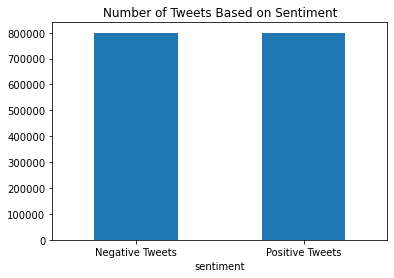

In [3]:
%%time
print(data_set.groupby('sentiment').count())
ax = data_set.groupby('sentiment').count().plot(kind='bar', title='Number of Tweets Based on Sentiment', legend=False)
ax.set_xticklabels(['Negative Tweets','Positive Tweets'], rotation=0)

# Preprocessing Tweets(Cleaning the Dataset)

### 1. https://medium.com/analytics-vidhya/pre-processing-tweets-for-sentiment-analysis-a74deda9993e
### 2.https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
### 3. https://docs.python.org/3/library/re.html
### 4. https://www.w3schools.com/python/ref_string_lower.asp
### 5. https://www.w3schools.com/python/ref_string_replace.asp
### 6. https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/


In [4]:
%%time
import re as charRemoval
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
class TweetsPreProcessing:
    def TweetsProcessing(self, tweetlists):
        Tweets_Processed=[]
        for t in tweetlists:
            Tweets_Processed.append((self.TweetCleaner(t)))
        return Tweets_Processed
    # tweet cleaner function convert texts to lowercases and removes hashtags urls and usernames
    def TweetCleaner(self, t):
        stopwordlist = list(stopwords.words('english'))
        urlLinks=r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
        username='@[^\s]+'
        Alpha_Patterns_Rep = "[^a-zA-Z0-9]"
        Sequence_Pattern_Rep   = r"(.)\1\1+"
        Sequence_Replace_Pattern = r"\1\1"
        emojis_Replacements = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
                  ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
                  ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
                  ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
                  '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
                  '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
                  ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
        t = t.lower()
        t = charRemoval.sub(urlLinks,' URL',t)
        for emoji in emojis_Replacements.keys():
            t = t.replace(emoji, "EMOJI" + emojis_Replacements[emoji]) 
        t = charRemoval.sub(username, ' USER', t)
        t = charRemoval.sub(Alpha_Patterns_Rep, " ", t)
        t = charRemoval.sub(Sequence_Pattern_Rep, Sequence_Replace_Pattern, t)
        wordcleaned=' '
        #loop through t and if the word is important then append it
        for w in t.split():
#             if w not in stopwordlist:
            if len(w)>1: wordcleaned += (w+' ')
#                 w = WordNetLemmatizer().lemmatize(w)      
        return wordcleaned
processedtext =TweetsPreProcessing().TweetsProcessing(text)

Wall time: 15min 57s


# Visualization after processing the text

## positve words followed by negative words

### https://www.datacamp.com/community/tutorials/wordcloud-python

Wall time: 49.7 s


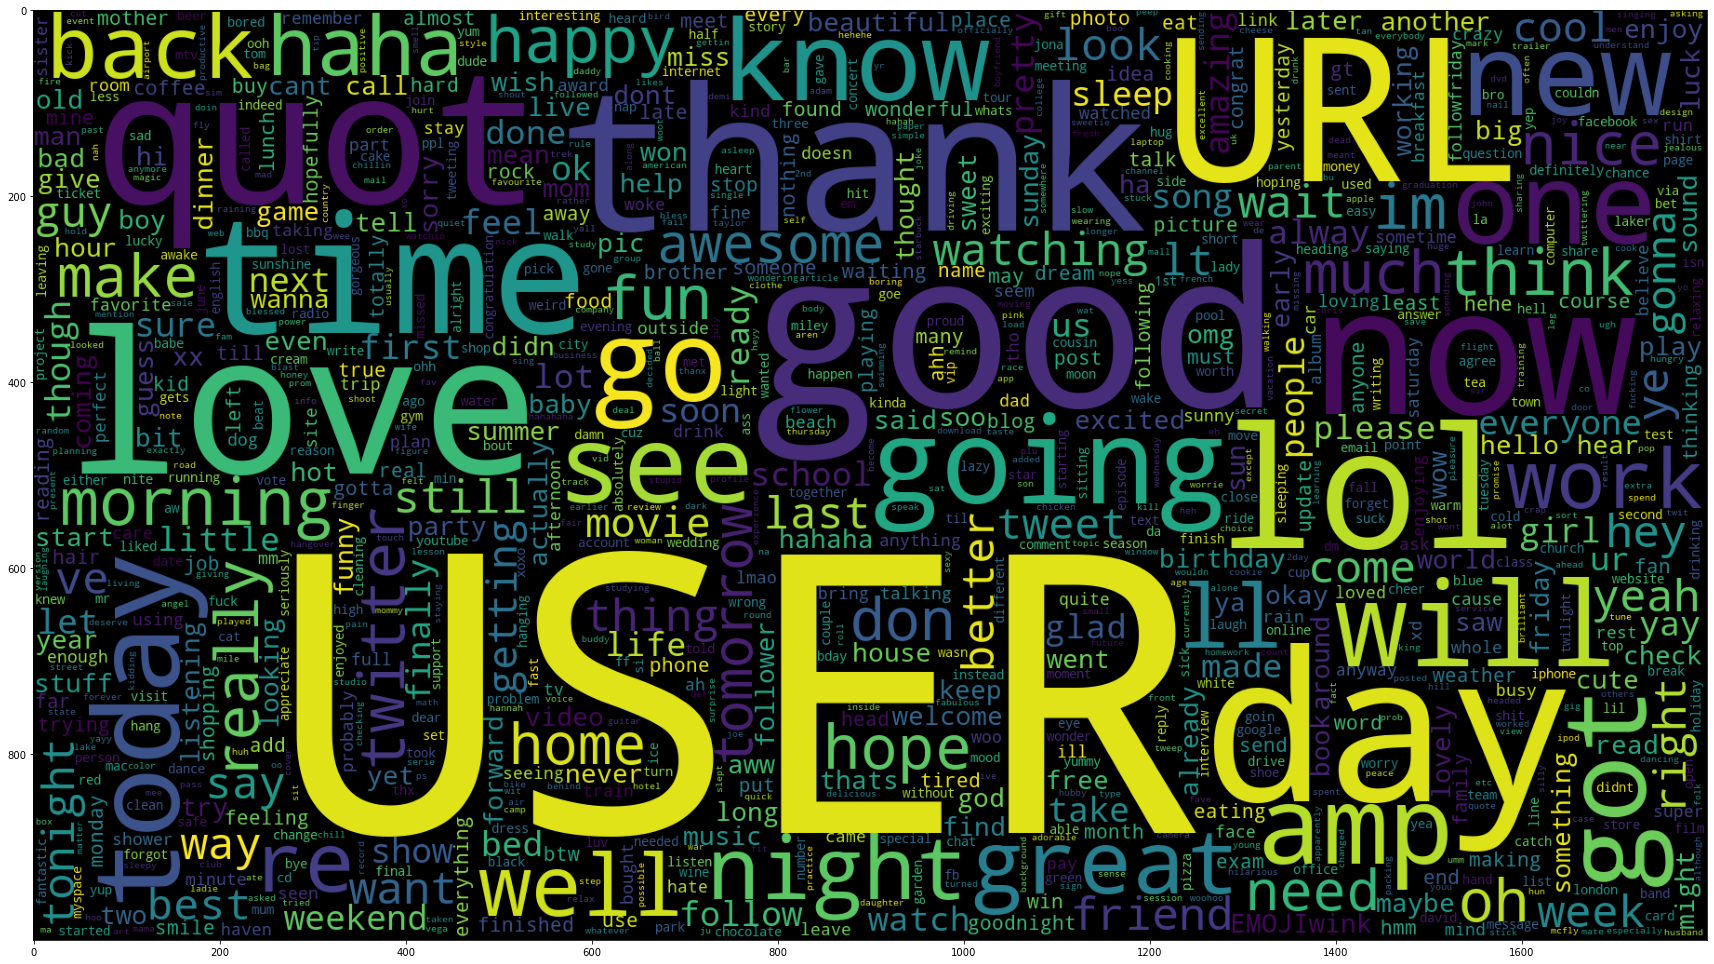

In [5]:
%%time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_sentiment = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1800 , height = 1000,collocations=False).generate(" ".join(positive_sentiment))
plt.figure(figsize = (30,30))
plt.imshow(wc)

Wall time: 50.6 s


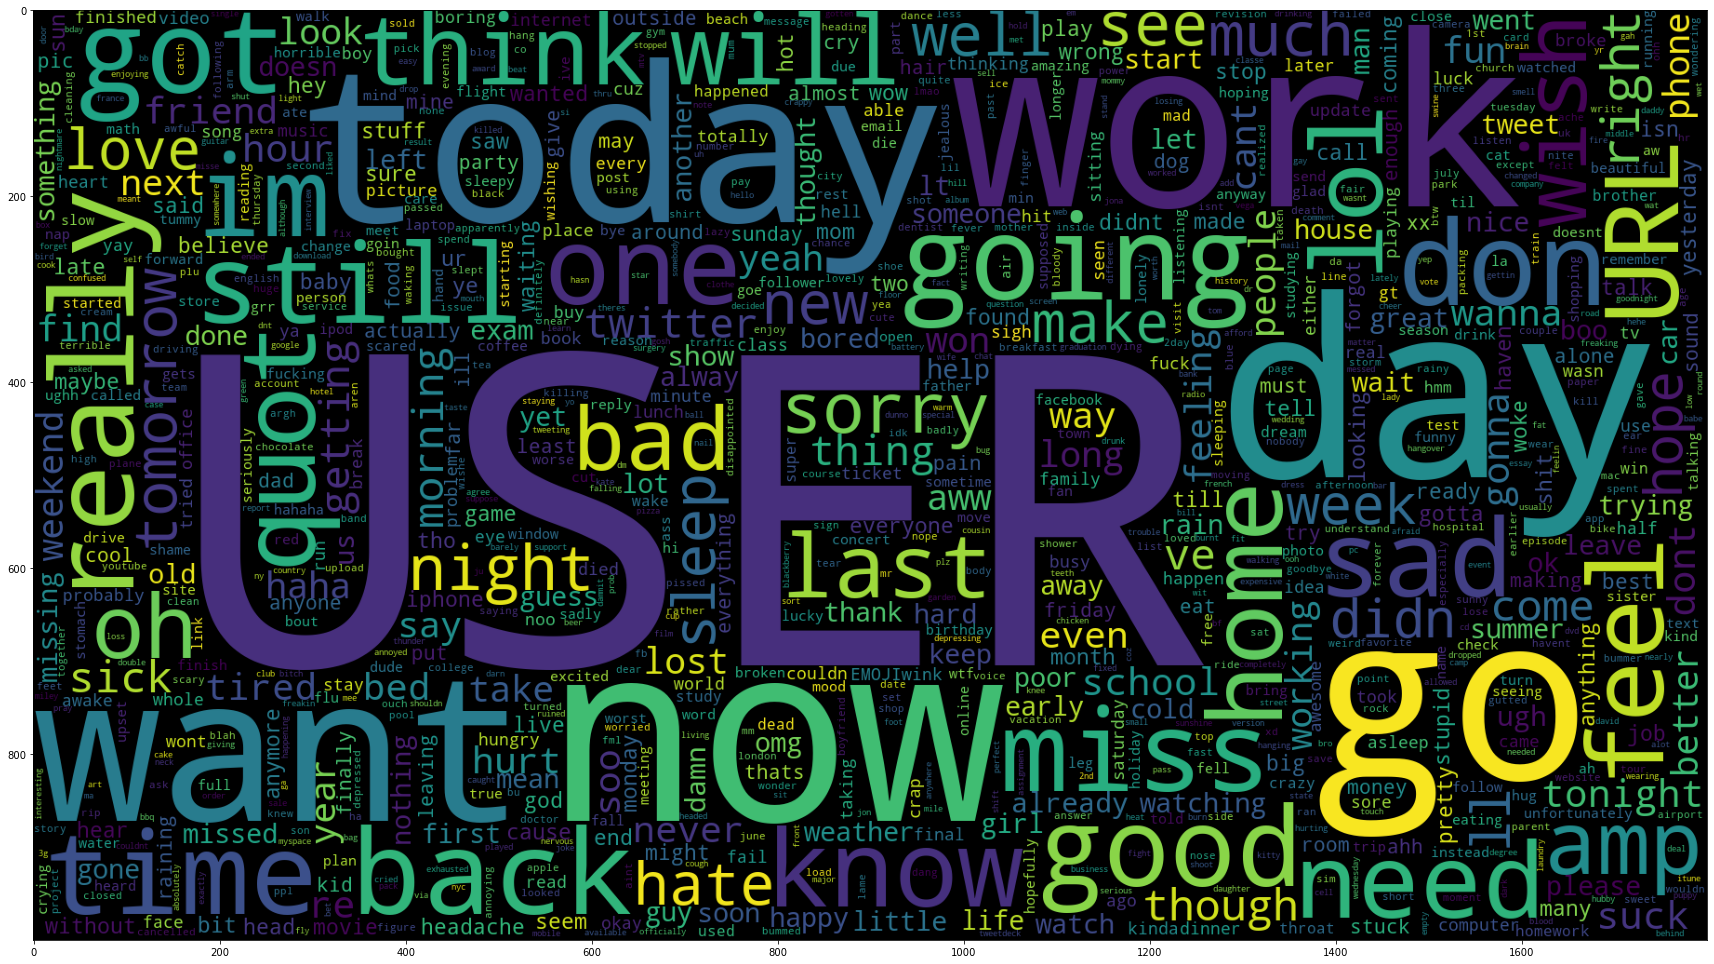

In [6]:
%%time
negative_sentiment = processedtext[:800000]
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 1000 , width = 1800 , height = 1000, collocations=False).generate(" ".join(negative_sentiment))
plt.imshow(wc)

# Spliting the Dataset

### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
%%time
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.20, random_state = 0)

Wall time: 1.09 s


# Vectoriazion and Features

### https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


In [30]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train1)
X_train = vectoriser.transform(X_train1)
X_test  = vectoriser.transform(X_test1)

Wall time: 2min 53s


In [31]:
feature_names = vectoriser.get_feature_names()
for i in range (200):
    doc=i
    print("Sentence: ", i+1  )
    print("Full Sentence", X_train1[i])
    feature_index = X_train[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [X_train[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        print (w, s)
    print()

Sentence:  1
Full Sentence  USER thx like ur pic as well 
well 0.1573481598865778
user thx 0.28671491677284605
user 0.060112702546929124
ur pic 0.37436056917247545
ur 0.20021481654438733
thx like 0.4448923738082309
thx 0.25165477769036815
pic as 0.41479626658516905
pic 0.2240517164114846
like ur 0.35115417261033444
like 0.13745474244899117
as well 0.2359024519730107
as 0.1668031047085933

Sentence:  2
Full Sentence  URL who wore it better USER or USER 
wore it 0.40826472888124626
wore 0.31686641240787683
who 0.1855814280460401
user or 0.2938140856109787
user 0.1199260433154343
url who 0.38008393941606916
url 0.13736295441678362
or user 0.35215995703370506
or 0.16769127196760972
it better 0.297641575190327
it 0.09500906487878069
better user 0.3913214122943239
better 0.1776150076535775

Sentence:  3
Full Sentence  can get it to work as yet thinking there must switch in the garage exciting have plans now fairy lights around the parasol 
yet thinking 0.25730191131912505
yet 0.1107489224426

wlm 0.35760882510000924
user 0.04775790322222959
try it 0.23447140590099205
try 0.16264046443690605
sounds good 0.22506080898524963
sounds 0.1673510205556519
so full 0.272920761620209
so 0.09190799352792657
pidgin 0.31167025310728846
of ads 0.34127502576833285
of 0.08730471322269806
might try 0.28919001618959883
might 0.16472628230958847
it 0.07567053160889832
is so 0.17375349679563304
is 0.08049978874634643
good might 0.31086579261069575
good 0.10477008725179346
full of 0.21804890111531444
full 0.18116405146171308
ads 0.25385725993385116

Sentence:  20
Full Sentence  thank penny and katina for coming to support me and thanks to jr and my handsome hubby for sitting thru the whole show 
whole show 0.2206293818153752
whole 0.12415847799498629
to support 0.18584117432642816
to jr 0.24419224511411372
to 0.08464583267895355
thru the 0.18501428440917472
thru 0.14999570791824882
the whole 0.13852236008940103
the 0.04362849243990396
thanks to 0.14365363341928145
thanks 0.08822240726010586
than

watch lol 0.38580076941890157
watch 0.1720001050305504
wanna watch 0.2765584001142088
wanna 0.17029333256315668
user like 0.23239494296193614
user 0.05398881962572043
shows 0.2269520697416111
makeover 0.32423625965875075
lol 0.13241953146851645
like home 0.3214330673653846
like 0.12345176613852885
home makeover 0.41661739425376476
home 0.14343636669991278
boo wanna 0.36610242146420935
boo 0.1956048338817295

Sentence:  41
Full Sentence  USER can have lotsa cuddling tonight alone xx 
xx 0.19232301392741266
user can 0.20920804949668806
user 0.05672569204569519
tonight alone 0.4377371124457823
tonight 0.16437014921235327
lotsa 0.32631130092149757
have lotsa 0.4053582906380654
have 0.11033095284344244
cuddling 0.3177248398783134
can have 0.2565076697360027
can 0.12414173849716545
alone xx 0.43059484398582626
alone 0.2164694970898549

Sentence:  42
Full Sentence  oh noes have not set btcc on to record missed first hours 
to record 0.24997652529687422
to 0.05736850716469184
set 0.18132696598

bit 0.2930246977691606

Sentence:  55
Full Sentence  happy mothers day 
mothers day 0.5198711608611759
mothers 0.5062651439436829
happy mothers 0.5424860474081793
happy 0.33438494984396466
day 0.25947094985341834

Sentence:  56
Full Sentence  what bad day so much bullshit swear could this day get any worse hope not 
worse hope 0.3069035159267194
worse 0.17826605779231147
what bad 0.26240584570332437
what 0.10469603484303595
this day 0.20547421617693057
this 0.09357442055378742
swear 0.20065702911617186
so much 0.14013889144551278
so 0.08265148113896405
not 0.09032621190381045
much bullshit 0.32601053095805993
much 0.11592304250671644
hope not 0.22411646652348724
hope 0.118046464176318
get any 0.2068534455888612
get 0.09706731324483574
day so 0.20739158944442065
day get 0.2539032858408197
day 0.19229264345650426
could this 0.2768615712363861
could 0.12871040211561077
bullshit 0.2341967879026472
bad day 0.2042328803989362
bad 0.1235402544807465
any worse 0.2526973944902869
any 0.13747734

he has 0.17126060450502806
he getting 0.22905362395724493
he 0.2037088382692558
has grey 0.2856078903376348
has 0.10241414199642587
hairs on 0.2739210093748335
hairs 0.2152860974576056
grey hairs 0.2644818612092144
grey 0.1782917834534523
gonna be 0.14014097672756173
gonna 0.10915274418524147
getting old 0.19867336216899584
getting 0.10853725714146245
face 0.13975043222800104
dog is 0.19764283485171524
dog 0.14200564086506642
be he 0.2594454910575407
be 0.07714962718273717

Sentence:  72
Full Sentence  USER was the product director for that film once 
was the 0.23636088310801795
was 0.12521526925641704
user was 0.22699525913418614
user 0.0581837731971973
the product 0.3915621064531534
the 0.07615263905995041
that film 0.3584810380252884
that 0.10945426063564256
product 0.30702647363833907
once 0.21380743722469722
for that 0.24630192789596167
for 0.1008042387240736
film 0.2542317714288253
director for 0.4306164234524703
director 0.33625015241564243

Sentence:  73
Full Sentence  going to

death and 0.3720259705398637
death 0.2477742033857289
asshole 0.3055144736225183
and 0.0879788803188455

Sentence:  86
Full Sentence  may have to work for big corporate jewellery company just to get employment 
work for 0.23587893375416358
work 0.12655034196776857
to work 0.16826367238967976
to get 0.15715623446295546
to 0.13421357547943571
may have 0.24266234667809747
may 0.18733053198720054
just to 0.24697287768642767
just 0.10610517548713039
jewellery 0.3325358395875954
have to 0.14985777723065308
have 0.10280057889959734
get 0.11945611775977887
for big 0.30956897123342786
for 0.09157035689832348
employment 0.32810952310032443
corporate 0.3066763795929998
company just 0.3776915350171481
company 0.22983712623769
big 0.17836747592862806

Sentence:  87
Full Sentence  USER aww yuo are soo sweet missin af really bad but if they dont want me there there is nothing can do 
yuo 0.2716591178618603
want me 0.1963391584058369
want 0.1025916621183126
user aww 0.1307564999697395
user 0.038970266

too 0.08252339752799762
to school 0.1402701656471283
to 0.04423244720794831
slept in 0.18442898228952734
slept 0.14663328552003302
sleep too 0.1972010317469528
sleep 0.09949528238345459
school and 0.17148617389642806
school 0.10571781890762975
parents go 0.2552097427304543
parents 0.14548084269434525
out of 0.11734815108036958
out 0.07865756524758911
on twitter 0.13377805215416405
on 0.06513962461045206
of town 0.17860690756971667
of 0.06368614343413723
now am 0.16894832117040906
now 0.07576500788938417
need sleep 0.18436200665251457
need 0.09461126667262988
my parents 0.1576706563725883
my 0.053749346861266555
late didn 0.25289444267752237
late 0.12150647670381162
insomnia 0.17468494853576202
in late 0.21229310532799867
in 0.0605726000518246
hate when 0.1667828179178239
hate 0.1066410208026188
go to 0.10600626801161345
go out 0.14431362637395825
go 0.1618335275188926
didn go 0.17586389977220923
didn 0.10551694021878333
and now 0.1326819755923144
and 0.0545297996765932
am on 0.17830981

my cousin 0.4378987598178527
my 0.14281360451845398
house 0.304108356765208
cousin house 0.5940387188210312
cousin 0.40947388627554343
at my 0.3705592840324307
at 0.19365436188540042

Sentence:  136
Full Sentence  is feeling frustrated with her computer 
with her 0.2823885982528442
with 0.13254897352598483
is feeling 0.3118561098505268
is 0.10805694168710182
her computer 0.409639647598367
her 0.1831771660611077
frustrated with 0.388666323242021
frustrated 0.3210705467773074
feeling frustrated 0.4866225210970196
feeling 0.20517352233095806
computer 0.24362458642463275

Sentence:  137
Full Sentence  thweetherr 

Sentence:  138
Full Sentence  USER awesome it always pleases me to see your tweet how business it coming together better for me here 
your tweet 0.1991582590359145
your 0.09588221699316944
user awesome 0.17797876845214256
user 0.03985645937438324
tweet how 0.26224850401455896
tweet 0.13410376358961368
together 0.15858544715754272
to see 0.1222612480795174
to 0.050604270898678555


performing 0.18918045376197518
on 0.066057299511302
my ticket 0.20307376948996858
my 0.05450655765034665
jam in 0.24498771445858075
jam 0.1702148345688923
in hartford 0.24912685138813276
in 0.06142593556118923
ill 0.12933431198645545
if you 0.11807684199829367
if 0.09215559137018474
hot jam 0.2681742642568176
hot 0.12031747826322695
hartford 0.231803225640985
cause 0.12822483817295177
at hot 0.22996183192901734
at 0.0739105540815877
arent 0.17495050115404043
are you 0.11791480862449645
are 0.08094581681941616

Sentence:  166
Full Sentence  watching grease miss tj tre erik joe julia and devon 
watching grease 0.3071965135507038
watching 0.13741238084574628
tre 0.3071965135507038
tj 0.2667727347897021
miss tj 0.35705017245322973
miss 0.12526533590914637
julia and 0.33312797879398753
julia 0.2636748656929153
joe 0.20692628011062683
grease 0.2620813622949436
erik 0.2938600592215864
devon 0.27275312359930615
and devon 0.34646443312310493
and 0.07242309358107098

Sentence:  167
Full Sentence

# Helper function to plot confusion Matrix

### 1.    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### 2.   https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [32]:
%%time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def confusion_matrix_plot(y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    names = ['True Neg','False Pos', 'False Neg','True Pos']
    percentages = ['{0:.2%}'.format(value) for value in matrix.flatten() / np.sum(matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print(matrix.flatten())
    sns.heatmap(matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.title ("Confusion Matrix")
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values"   )
    false_pos_ind=[]
    false_neg_ind=[]
    #false pos and neg indicies
    for i in range(len(y_test)):
        if y_test[i]!=y_pred[i]:
            if y_test[i]==0:
                false_pos_ind.append(i)
            if y_test[i]==1:
                false_neg_ind.append(i)         
#     print(len(false_pos_ind))
#     print(len(false_neg_ind))
    return false_pos_ind, false_neg_ind
    

Wall time: 345 ms


# Helper function to evaluate the model

### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [33]:
%%time
def Evaluateion(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    return confusion_matrix_plot(y_pred)

Wall time: 0 ns


# Logestic Regression Model
### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


              precision    recall  f1-score   support

           0       0.83      0.82      0.82    159815
           1       0.82      0.84      0.83    160185

    accuracy                           0.83    320000
   macro avg       0.83      0.83      0.83    320000
weighted avg       0.83      0.83      0.83    320000

[130525  29290  26285 133900]
False Positives: 
Tweet:   where the are my pinking shears rarararrarararr babyproofing while cutting stuff makes me stick shears random places amp forget them 
Tweet:   song of my life now your love is lie simple plan beautifulylost 
Tweet:   watching the last leno so glad got to go once 
Tweet:   sun burns are noo fun bored sittin at home watching bride wars with my sister have good weekend everyone 
Tweet:   USER do more that anything 
Tweet:   USER looking for mascot for URL needs to be an octopus but the one youhave isnt cutting it if sign up ull see 
Tweet:   USER ok was confused for moment have to agree that ur dad sure could ve

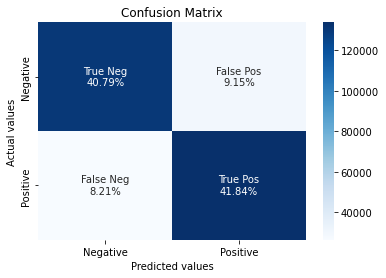

In [34]:
%%time
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LogisticRegressionModel.fit(X_train, y_train)
fp_LogisticRegressionModel, fn_LogisticRegressionModel =Evaluateion(LogisticRegressionModel)
print("False Positives: ")
for i in fp_LogisticRegressionModel[:300]:
    print ("Tweet: ", X_test1[i])
print("False Negatives: ")
for i in fn_LogisticRegressionModel[:300]:
    print ("Tweet: ", X_test1[i])

# Linear Support Vector Classification Model

### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

              precision    recall  f1-score   support

           0       0.82      0.81      0.81    159815
           1       0.81      0.82      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000

[129133  30682  28275 131910]
False Positives: 
Tweet:   where the are my pinking shears rarararrarararr babyproofing while cutting stuff makes me stick shears random places amp forget them 
Tweet:   song of my life now your love is lie simple plan beautifulylost 
Tweet:   watching the last leno so glad got to go once 
Tweet:   USER do more that anything 
Tweet:   USER looking for mascot for URL needs to be an octopus but the one youhave isnt cutting it if sign up ull see 
Tweet:   USER ok was confused for moment have to agree that ur dad sure could ve timed the announcement diff time though 
Tweet:   huh turns out like marmite when did stop being loved by all 
Twe

Tweet:   the hills season fnale tonight 
Tweet:   USER ahh eu te amo too lol loot lt 
Tweet:   USER think ve been following you for bit now we re mutual followers yay 
Tweet:   USER think the same hyper banning crew at digg have come to twitter 
Tweet:   USER man nevr seem2b the rt caller bet haven heard this b4 wk USER seriously do URL 
Tweet:   helping one of my ta modify client trip to disney world trying to save them from cancelling 
Tweet:   USER she pays for it guess she has some say in this case all the say because she wants my hair gone 
Tweet:   tosh or web soup which do you prefer love the comedian on tosh but found web soup funnier alas am torn 
Tweet:   USER wish was back in sydney oh well only days til am go eat place called eating world tis awesome if like asian food 
Tweet:   72 more hours to the exam questions appear in front of me hope that the examiner decided to have good year this time round 
Tweet:   listening to music to help soothe the soul amp classics 
Tweet:  

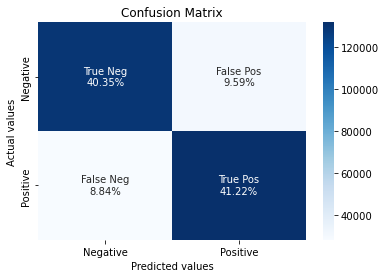

In [35]:
%%time
from sklearn.svm import LinearSVC
LinearSVCModel = LinearSVC()
LinearSVCModel.fit(X_train, y_train)
fp_LinearSVCModel, fn_LinearSVCModel=Evaluateion(LinearSVCModel)

print("False Positives: ")
for i in fp_LinearSVCModel[:300]:
    print ("Tweet: ", X_test1[i])
print("False Negatives: ")
for i in fn_LinearSVCModel[:300]:
    print ("Tweet: ", X_test1[i])

# Naive Bayes Model

### https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159815
           1       0.80      0.81      0.80    160185

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

[126476  33339  30256 129929]
False Positives: 
Tweet:   where the are my pinking shears rarararrarararr babyproofing while cutting stuff makes me stick shears random places amp forget them 
Tweet:   USER can watch it what is it 
Tweet:   song of my life now your love is lie simple plan beautifulylost 
Tweet:   watching the last leno so glad got to go once 
Tweet:   sun burns are noo fun bored sittin at home watching bride wars with my sister have good weekend everyone 
Tweet:   USER do more that anything 
Tweet:   USER looking for mascot for URL needs to be an octopus but the one youhave isnt cutting it if sign up ull see 
Tweet:   USER ok was confused for moment 

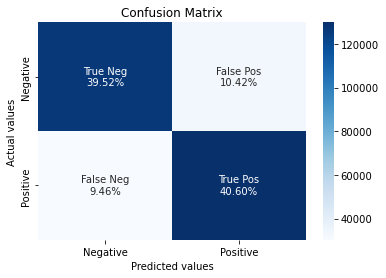

In [36]:
%%time
from sklearn.naive_bayes import BernoulliNB
BernoulliNBModel = BernoulliNB(alpha = 2)
BernoulliNBModel.fit(X_train, y_train)
fp_BernoulliNBModel, fn_BernoulliNBModel= Evaluateion(BernoulliNBModel)
print("False Positives: ")
for i in fp_BernoulliNBModel[:300]:
    print ("Tweet: ", X_test1[i])
print("False Negatives: ")
for i in fn_BernoulliNBModel[:300]:
    print ("Tweet: ", X_test1[i])
    

# Saving the Models

### https://docs.python.org/3/library/pickle.html

In [37]:
%%time
import pickle
file = open('vectoriser.pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('LogisticRegressionModel.pickle','wb')
pickle.dump(LogisticRegressionModel, file)
file.close()

file = open('BernoulliNBModel.pickle','wb')
pickle.dump(BernoulliNBModel, file)
file.close()

file = open('LinearSVCModel.pickle','wb')
pickle.dump(LinearSVCModel, file)
file.close()

Wall time: 4.39 s
